In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df['ca'].nunique()

5

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df['ca'].nunique()

5

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
len(df)

303

In [10]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [11]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')]) * 100 / len(df)

1.9801980198019802

In [12]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


2% of rows contains missing values. We remove them rather then impute because 303 - 6 = 297 is plenty of data to build a classification tree

In [13]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
len(df_no_missing)

297

In [14]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [16]:
X = df_no_missing.drop('hd', axis = 1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [17]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [18]:
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [19]:
X_encoded['sex'].unique()

array([1., 0.])

In [20]:
X_encoded['fbs'].unique()

array([1., 0.])

In [21]:
X_encoded['exang'].unique()

array([0., 1.])

We musy check every categorical column like that

In this tutorial we only care if someone has a heart disease or not, so we need to convert all numbers > 0 to 1.

In [22]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [23]:
y_not_zer_index = y > 0
y[y_not_zer_index] = 1
y.unique()

array([0, 1], dtype=int64)

We always remove missing values first and then divide the set into training and test data.</br>
On the other hand, it is better to do imputing values after such a division.

Preliminary (not optimized) Classification Tree

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

In [25]:
X_train.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
66,60.0,1.0,140.0,185.0,0.0,155.0,0.0,3.0,0.0,0,...,0,0,0,1,0,1,0,1,0,0
105,54.0,1.0,108.0,309.0,0.0,156.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,1
160,46.0,1.0,101.0,197.0,1.0,156.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,1
147,41.0,1.0,112.0,250.0,0.0,179.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,1,0,0
19,49.0,1.0,130.0,266.0,0.0,171.0,0.0,0.6,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [27]:
y_train.head()

66     1
105    0
160    0
147    0
19     0
Name: hd, dtype: int64

[Text(479.8318965517241, 390.7125, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No disease'),
 Text(277.79741379310343, 356.73749999999995, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No disease'),
 Text(169.5646551724138, 322.7625, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No disease'),
 Text(122.66379310344828, 288.78749999999997, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No disease'),
 Text(72.15517241379311, 254.81249999999997, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No disease'),
 Text(43.293103448275865, 220.83749999999998, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No disease'),
 Text(28.862068965517242, 186.86249999999998, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No disease'),
 Text(14.431034482758621, 152.8875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No disease'),
 Text(43.29310344827

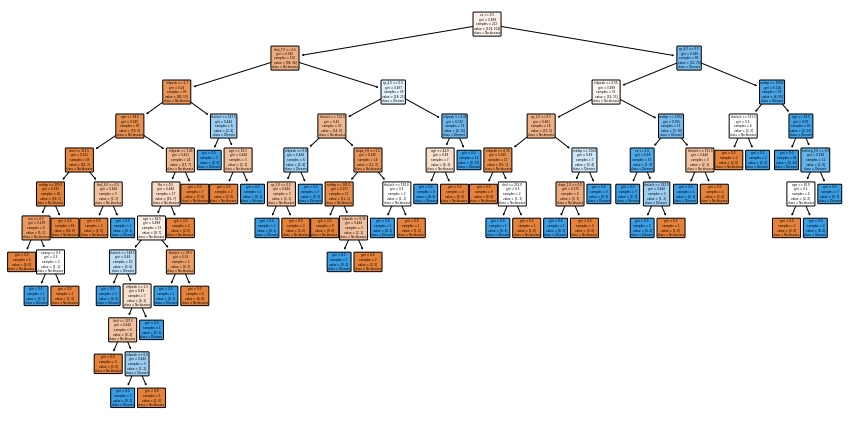

In [27]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ["No disease", "Disease"], feature_names = X_encoded.columns)

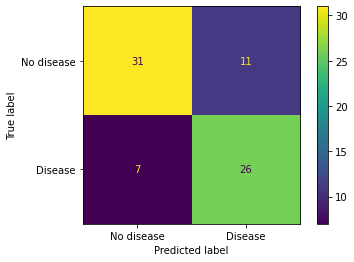

In [28]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ['No disease', 'Disease'])

In [29]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # we omit max values for aplha because it would prune all leaves,
# leaving us with only a root instead of a tree

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

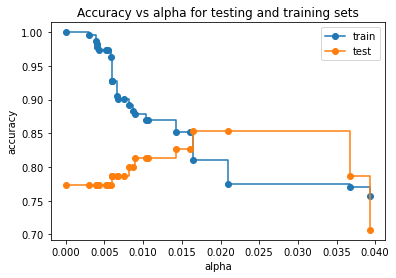

In [30]:
# clf_dt.score(X_train, y_train) - return the mean accuracy on the given data and labels
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for testing and training sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()
# alpha = 0 means full size tree, larger alpha means smaller tree
# 0.16 chosen

When we apply Cost Complexity Pruning to a Classification Tree, values for alpha go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for alpha for a Regresion Tree can be much larger since the sum of squared residuals can, in theory, go from 0 to positive infinity.

Cross Validation for finding best alpha

<AxesSubplot:xlabel='tree'>

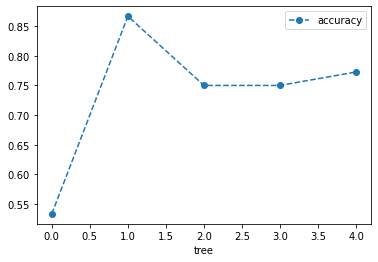

In [31]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
# we use 5 fold cross validations because we don't have tons of data
# we create 5 different testing and training datasets that are used to train and test the tree
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})
df.plot('tree', 'accuracy', marker = 'o', linestyle = '--')

This graph shows that using different Training and Testing data wit the same alpha resulted in different accuracies suggesting that alpha is sensitive to the datasets. So instead of picking a simple Training and Testing dataset, let's find the optimal value for ccp_alpha.

<AxesSubplot:xlabel='alpha'>

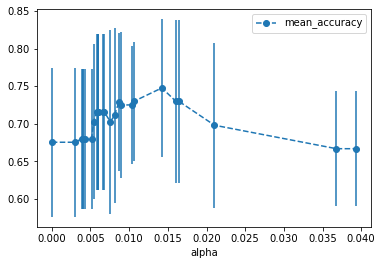

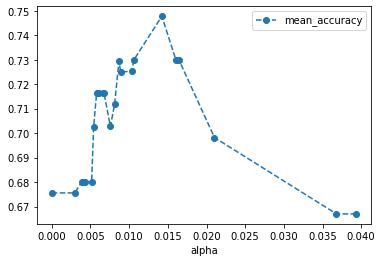

In [32]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', marker = 'o', linestyle = '--')

We can see that instead of setting ccp_alpha to 0,016 we should seti it to 0,014

In [43]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [44]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [45]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [48]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

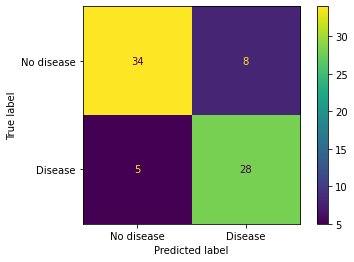

In [49]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels = ['No disease', 'Disease'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No disease'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No disease'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No disease'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No disease'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Disease'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Disease'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No disease'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Disease'),
 Text(708.2307692307693, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nval

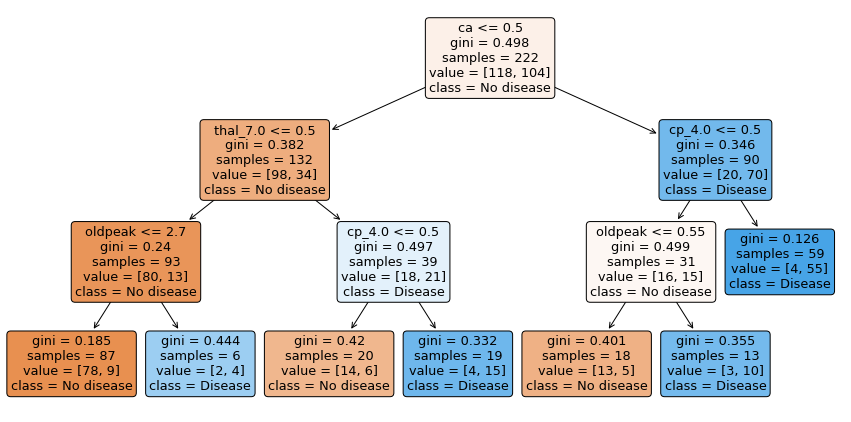

In [51]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt_pruned, filled = True, rounded = True, class_names = ["No disease", "Disease"], feature_names = X_encoded.columns)